In [1]:
import pandas as pd
import numpy as np
import pickle

## Input Data

In [2]:
df = pd.read_csv('../Dataset/clean_data.csv')
df.head(3)

,type,city,hotelFacilities,nearestPointOfInterests,starRating,size,originalRate,baseOccupancy,maxChildOccupancy,maxChildAge,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom,roomFacilities
0,Hotel,Badung,"[""CARPARK"",""ELEVATOR"",""HAS_24_HOUR_ROOM_SERVIC...","[{""landmarkId"":""91589773100576"",""geoId"":null,""...",4,46.0,1227273,3,1,5,1,1,1,0,"[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB..."
1,Hotel,Badung,"[""CARPARK"",""ELEVATOR"",""HAS_24_HOUR_ROOM_SERVIC...","[{""landmarkId"":""91589773100576"",""geoId"":null,""...",4,31.0,596694,2,1,5,0,1,1,0,"[""AIR_CONDITIONING"",""BATHROBES"",""BATHTUB"",""BLA..."
2,Hotel,Badung,"[""CARPARK"",""ELEVATOR"",""HAS_24_HOUR_ROOM_SERVIC...","[{""landmarkId"":""91589773100576"",""geoId"":null,""...",4,52.0,1450413,2,1,5,1,1,1,1,"[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB..."


In [3]:
print(f'Total number of rows: {df.shape[0]}')
print(f'Total number of columns: {df.shape[1]}')

Total number of rows: 4953
Total number of columns: 15


### Feature Processing Function

In [4]:
# Rooms facilities processing
# How to use : Facilities = getFacilities(df['Facilities'].tolist())
def getFacilities(facilitiesList):
    facilities = []
    for i in facilitiesList:
        m = int(i.count('"') / 2)
        for j in range(1, m+1, 2):
            temp = i.split('"')[j]
            if temp not in facilities:
                facilities.append(temp)
    # facilities = [f"{prefix}_" + string for string in facilities]
    return facilities

In [5]:
# seperate the target variable
dfPrice = df[['originalRate']]
dfPrice.head(2)

,originalRate
0,1227273
1,596694


## Getting extraxcted features

### Getting the data

In [6]:
# Hotel Facilities to List
hotelFacilities = getFacilities(df['hotelFacilities'].tolist())
print(f' Total Unique Hotel Facilities: {len(hotelFacilities)}')

 Total Unique Hotel Facilities: 240


In [7]:
# Room Facilities to List
roomFacilities = getFacilities(df['roomFacilities'].tolist())
print(f' Total Unique Hotel Facilities: {len(roomFacilities)}')

 Total Unique Hotel Facilities: 110


In [8]:
# nearestPointOfInterests to List
# landmarkType is present at indexes [19, 49, 79, 109]

landmark = df['nearestPointOfInterests'].to_list()
searchText = 'landmarkType'
nearestPoint = []
loopCount = 0
for x in range(len(landmark)):
    loopCount += 1
    i = 0
    column = landmark[x].split('"')
    matched_indexes = []
    while i < len(column):
        if searchText == column[i]:
            matched_indexes.append(i)
        i += 1
    for y in matched_indexes:
        if column[y+2] not in nearestPoint:
            nearestPoint.append(column[y+2])
if 'OTHERS' in nearestPoint:
    nearestPoint.remove('OTHERS')

print(f' Total Unique Hotel Facilities: {len(nearestPoint)}')


 Total Unique Hotel Facilities: 19


In [9]:
# Create new dataframe
dfHotelEncode = pd.DataFrame(columns=hotelFacilities)
dfRoomEncode = pd.DataFrame(columns=roomFacilities)
dfPointEncode = pd.DataFrame(columns=nearestPoint)

### Extra Features

In [10]:
dfHotelEx = df[['originalRate', 'type', 'city', 'starRating']]
dfRoomEx = df[['originalRate', 'size', 'baseOccupancy', 'maxChildOccupancy',
               'maxChildAge', 'isBreakfastIncluded', 'isWifiIncluded', 'isRefundable', 'hasLivingRoom']]
print(dfHotelEx.shape)
print(dfRoomEx.shape)


(4953, 4)
(4953, 9)


#### Hotel Extra Features

In [11]:
dfHotelEx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4953 entries, 0 to 4952
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   originalRate  4953 non-null   int64 
 1   type          4953 non-null   object
 2   city          4953 non-null   object
 3   starRating    4953 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 154.9+ KB


In [12]:
dfHotelEx['city'].unique()

array(['Badung', 'Denpasar', 'Gianyar', 'Sanur', 'Bangli', 'Buleleng',
       'Klungkung', 'Tabanan', 'Jembrana', 'Karangasem'], dtype=object)

In [13]:
dfHotelEx['type'].unique()

array(['Hotel', 'Resor', 'Apartemen', 'Vila', 'Guest House', 'Homestay',
       'B&B', 'Hostel', 'Camping', 'Lainnya', 'Hotel Kapsul'],
      dtype=object)

In [14]:
cityEncode = pd.get_dummies(dfHotelEx['city'], prefix='City')
typeEncode = pd.get_dummies(dfHotelEx['type'], prefix='Type')
dfHotelEx = pd.concat([dfHotelEx, cityEncode, typeEncode], axis=1)

In [15]:
dfHotelEx.drop(['city', 'type'], axis=1, inplace=True)
print(dfHotelEx.shape)
dfHotelEx.head(2)

(4953, 23)


,originalRate,starRating,City_Badung,City_Bangli,City_Buleleng,City_Denpasar,City_Gianyar,City_Jembrana,City_Karangasem,City_Klungkung,...,Type_B&B,Type_Camping,Type_Guest House,Type_Homestay,Type_Hostel,Type_Hotel,Type_Hotel Kapsul,Type_Lainnya,Type_Resor,Type_Vila
0,1227273,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,596694,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [16]:
dfHotelEx.describe()

,originalRate,starRating,City_Badung,City_Bangli,City_Buleleng,City_Denpasar,City_Gianyar,City_Jembrana,City_Karangasem,City_Klungkung,...,Type_B&B,Type_Camping,Type_Guest House,Type_Homestay,Type_Hostel,Type_Hotel,Type_Hotel Kapsul,Type_Lainnya,Type_Resor,Type_Vila
count,4.953000e+03,4953.000000,4953.000000,4953.000000,4953.000000,4953.000000,4953.000000,4953.000000,4953.000000,4953.000000,...,4953.000000,4953.000000,4953.000000,4953.000000,4953.000000,4953.000000,4953.000000,4953.000000,4953.000000,4953.000000
mean,1.265925e+06,3.328084,0.427822,0.011104,0.072078,0.048052,0.195033,0.012720,0.053907,0.103170,...,0.021401,0.002423,0.132243,0.053907,0.021401,0.478296,0.000808,0.001211,0.136483,0.135877
std,1.190516e+06,1.152705,0.494813,0.104801,0.258642,0.213897,0.396266,0.112073,0.225856,0.304211,...,0.144732,0.049167,0.338789,0.225856,0.144732,0.499579,0.028410,0.034787,0.343335,0.342693
min,4.031300e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.407720e+05,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.391250e+05,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.652892e+06,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,6.611571e+06,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Room Extra Features

In [17]:
dfRoomEx.head(2)

,originalRate,size,baseOccupancy,maxChildOccupancy,maxChildAge,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom
0,1227273,46.0,3,1,5,1,1,1,0
1,596694,31.0,2,1,5,0,1,1,0


### Hotel Feature

In [18]:
dfHotel = pd.concat([df.pop('hotelFacilities'), dfHotelEncode], axis=1)
dfHotel = pd.concat([dfPrice, dfHotel], axis=1)
print(dfHotel.shape)
dfHotel.head(2)

(4953, 242)


,originalRate,hotelFacilities,CARPARK,ELEVATOR,HAS_24_HOUR_ROOM_SERVICE,RESTAURANT,RESTAURANT_FOR_BREAKFAST,RESTAURANT_FOR_DINNER,RESTAURANT_FOR_LUNCH,SAFETY_DEPOSIT_BOX,...,SMALL_PETS_ALLOWED,SUPERVISED_CHILDCARE_SURCHARGE,WATER_PARK_ACCESS_SURCHARGE,PRIVATE_BEACH,SURFING,PRIVATE_BEACH_NEARBY,BEACH_SUN_LOUNGERS,DARTS,ENTERTAINMENT_PROGRAMME_FOR_CHILDREN,KARAOKE
0,1227273,"[""CARPARK"",""ELEVATOR"",""HAS_24_HOUR_ROOM_SERVIC...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,596694,"[""CARPARK"",""ELEVATOR"",""HAS_24_HOUR_ROOM_SERVIC...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# add value to decoded columns
for i in range(len(dfHotel)):
    value = dfHotel['hotelFacilities'][i]
    if value == '[]':
        dfHotel.drop([i], axis=0, inplace=True)
        continue
    for j in range(2, len(dfHotel.columns)):
        column_name = dfHotel.columns[j]
        if column_name in value:
            dfHotel.loc[i, column_name] = 1
        else:
            dfHotel.loc[i, column_name] = 0
print(dfHotel.shape)
dfHotel.head()


(4895, 242)


,originalRate,hotelFacilities,CARPARK,ELEVATOR,HAS_24_HOUR_ROOM_SERVICE,RESTAURANT,RESTAURANT_FOR_BREAKFAST,RESTAURANT_FOR_DINNER,RESTAURANT_FOR_LUNCH,SAFETY_DEPOSIT_BOX,...,SMALL_PETS_ALLOWED,SUPERVISED_CHILDCARE_SURCHARGE,WATER_PARK_ACCESS_SURCHARGE,PRIVATE_BEACH,SURFING,PRIVATE_BEACH_NEARBY,BEACH_SUN_LOUNGERS,DARTS,ENTERTAINMENT_PROGRAMME_FOR_CHILDREN,KARAOKE
0,1227273,"[""CARPARK"",""ELEVATOR"",""HAS_24_HOUR_ROOM_SERVIC...",1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,596694,"[""CARPARK"",""ELEVATOR"",""HAS_24_HOUR_ROOM_SERVIC...",1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1450413,"[""CARPARK"",""ELEVATOR"",""HAS_24_HOUR_ROOM_SERVIC...",1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,855372,"[""CARPARK"",""ELEVATOR"",""HAS_24_HOUR_ROOM_SERVIC...",1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,2545455,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""HAS_24_HO...",1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0


In [20]:
# Remove hotelFacilities column
dfHotel.drop('hotelFacilities', axis=1, inplace=True)

In [21]:
for i in range(1, len(dfHotel.columns)):
    dfHotel = dfHotel.astype({dfHotel.columns[i]: int})


### Room Feature

In [22]:
dfRoom = pd.concat([df.pop('roomFacilities'), dfRoomEncode], axis=1)
dfRoom = pd.concat([dfPrice, dfRoom], axis=1)
print(dfRoom.shape)
dfRoom.head(2)

(4953, 112)


,originalRate,roomFacilities,AIR_CONDITIONING,BALCONY_TERRACE,BATHROBES,BATHTUB,BLACKOUT_DRAPES_CURTAINS,COFFEE_TEA_MAKER,COMPLIMENTARY_BOTTLED_WATER,DESK,...,ROLLAWAY_OR_EXTRA_BEDS,TABLET,YARD,VIDEO_GAMES,PORCH_OR_LANAI,IN_ROOM_SAFE_SURCHARGE,HOUSEKEEPING_ON_REQUEST,NO_HOUSEKEEPING,CHANGING_TABLE,MICROWAVE_SURCHARGE
0,1227273,"[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,596694,"[""AIR_CONDITIONING"",""BATHROBES"",""BATHTUB"",""BLA...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# add value to decoded columns
for i in range(len(dfRoom)):
    value = dfRoom['roomFacilities'][i]
    if value == '[]':
        dfRoom.drop([i], axis=0, inplace=True)
        continue
    for j in range(2, len(dfRoom.columns)):
        column_name = dfRoom.columns[j]
        if column_name in value:
            dfRoom.loc[i, column_name] = 1
        else:
            dfRoom.loc[i, column_name] = 0
print(dfRoom.shape)


(4739, 112)


In [24]:
dfRoom.drop('roomFacilities', axis=1, inplace=True)

In [25]:
for i in range(1, len(dfRoom.columns)):
    dfRoom = dfRoom.astype({dfRoom.columns[i]: int})


### Point of Interest Feature

In [26]:
dfPoint = pd.concat([df.pop('nearestPointOfInterests'), dfPointEncode], axis=1)
dfPoint = pd.concat([dfPrice, dfPoint], axis=1)
dfPoint.head(2)

,originalRate,nearestPointOfInterests,SHOPPING_AREA,OFFICIAL_BUILDING,RESTAURANT,ATTRACTION,BEACH,MONUMENT,TERMINAL,PARK,...,MUSEUM,GALLERY,PLACE_OF_WORSHIP,TRAIN_STATION,ZOO,ENTERTAINMENT,GARDEN,THEATER,STORE,SCHOOL
0,1227273,"[{""landmarkId"":""91589773100576"",""geoId"":null,""...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,596694,"[{""landmarkId"":""91589773100576"",""geoId"":null,""...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# add value to encoded columns
for i in range(len(dfPoint)):
    value = dfPoint['nearestPointOfInterests'][i]
    if value == '[]':
        dfPoint.drop([i], axis=0, inplace=True)
        continue
    for j in range(2, len(dfPoint.columns)):
        column_name = dfPoint.columns[j]
        if column_name in value:
            dfPoint.loc[i, column_name] = 1
        else:
            dfPoint.loc[i, column_name] = 0
print(dfPoint.shape)
dfPoint.head()


(4937, 21)


,originalRate,nearestPointOfInterests,SHOPPING_AREA,OFFICIAL_BUILDING,RESTAURANT,ATTRACTION,BEACH,MONUMENT,TERMINAL,PARK,...,MUSEUM,GALLERY,PLACE_OF_WORSHIP,TRAIN_STATION,ZOO,ENTERTAINMENT,GARDEN,THEATER,STORE,SCHOOL
0,1227273,"[{""landmarkId"":""91589773100576"",""geoId"":null,""...",1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,596694,"[{""landmarkId"":""91589773100576"",""geoId"":null,""...",1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1450413,"[{""landmarkId"":""91589773100576"",""geoId"":null,""...",1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,855372,"[{""landmarkId"":""91589773100576"",""geoId"":null,""...",1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2545455,"[{""landmarkId"":""91589773100576"",""geoId"":null,""...",1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
dfPoint.drop('nearestPointOfInterests', axis=1, inplace=True)

In [29]:
# Convert to int
for i in range(1, len(dfPoint.columns)):
    dfPoint = dfPoint.astype({dfPoint.columns[i]: int})


### Add Prefix

In [30]:
dfHotel = dfHotel.add_prefix('Hotel_')
dfRoom = dfRoom.add_prefix('Room_')
dfPoint = dfPoint.add_prefix('Point_')

## Feature Selection

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# create funtion to get the mean value of the columns and add to the dataframe
def getMean(df):
    dfMean = pd.DataFrame(columns=['Mean'])
    for i in range(1, len(df.columns)):
        dfMean.loc[i-1] = df[df.columns[i]].mean()
    dfMean.index = df.columns[1:]
    dfMean = dfMean.reset_index(drop=False)
    dfMean.columns = ['Facilities', 'Mean']
    return dfMean


In [33]:
# create function to remove outlier from data frame using IQR baesd on the mean value of the columns
def featureSelection(dfFunction):
    dfMean = getMean(dfFunction)
    initialLength = len(dfMean)
    q1 = dfMean['Mean'].quantile(0.25)
    q3 = dfMean['Mean'].quantile(0.75)
    iqr = q3 - q1

    # create list of facilities that will be removed then drop it from the dataframe (df)
    removedFacilities = []
    for i in range(len(dfMean)):
        if dfMean['Mean'][i] >= (q3 + 1.5 * iqr) or dfMean['Mean'][i] <= (q1 - 1.5 * iqr):
            removedFacilities.append(dfMean.loc[i, 'Facilities'])
    df = dfFunction.drop(removedFacilities, axis=1)

    # create new dataframe that will be used to store the cleaned data
    dfClean = dfMean[~dfMean['Facilities'].isin(removedFacilities)]
    print(f"Null value : {dfClean.isnull().sum().any()}")

    # calculate the number of facilities that will be removed
    print(f'Final Number of Features: {len(dfClean)}')
    calRemovedFacilities = initialLength - len(dfClean)
    print(f'Number of Facilities Removed: {calRemovedFacilities}')

    # print the q1, q3, and iqr
    print(f'Q1: {q1}')
    print(f'Q3: {q3}')
    print(f'IQR: {iqr}')

    return dfClean, df


In [34]:
# create function to make histplot of the dataframe clomuns mean
def getHist(df, title):
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x='Mean', kde=True, bins=50)
    plt.title(f'{title} Facilities')
    plt.show()

### Hotel, Room, and Point of Interest Features

#### Hotel Features

In [35]:
dfMeanHotel = getMean(dfHotel)
dfMeanRooom = getMean(dfRoom)
dfMeanPoint = getMean(dfPoint)

In [36]:
dfMeanHotel.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean,240.0,0.173744,0.209587,0.000613,0.023953,0.085189,0.237692,0.866394


In [37]:
dfHotel.shape

(4895, 241)

In [38]:
dfMeanHotel, dfHotel = featureSelection(dfHotel)
dfMeanHotel


Null value : False
Final Number of Features: 216
Number of Facilities Removed: 24
Q1: 0.023953013278855975
Q3: 0.23769152196118487
IQR: 0.2137385086823289


,Facilities,Mean
1,Hotel_ELEVATOR,0.191216
2,Hotel_HAS_24_HOUR_ROOM_SERVICE,0.194893
4,Hotel_RESTAURANT_FOR_BREAKFAST,0.385495
5,Hotel_RESTAURANT_FOR_DINNER,0.318284
6,Hotel_RESTAURANT_FOR_LUNCH,0.322983
...,...,...
235,Hotel_PRIVATE_BEACH_NEARBY,0.022268
236,Hotel_BEACH_SUN_LOUNGERS,0.050051
237,Hotel_DARTS,0.010419
238,Hotel_ENTERTAINMENT_PROGRAMME_FOR_CHILDREN,0.011849


In [39]:
dfHotel.shape

(4895, 217)

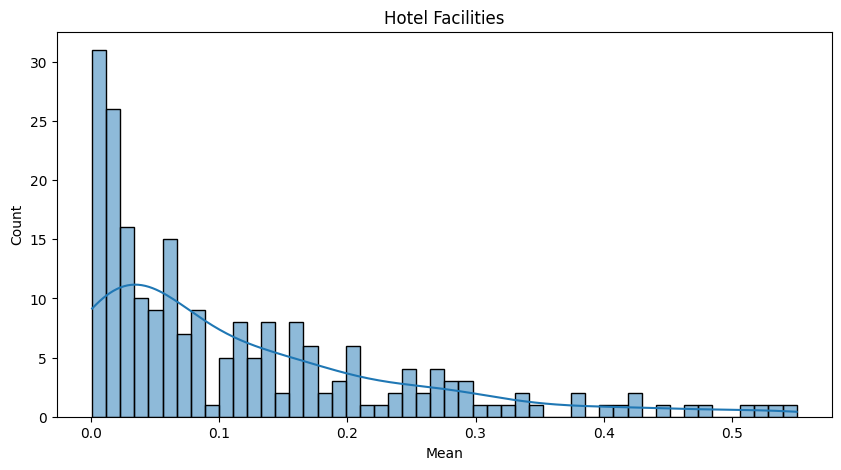

In [40]:
getHist(dfMeanHotel, 'Hotel')

#### Room Features

In [41]:
dfMeanRooom.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean,110.0,0.134488,0.218502,0.000211,0.00575,0.03524,0.121281,0.944081


In [42]:
dfMeanRooom, dfRoom = featureSelection(dfRoom)
dfMeanRooom


Null value : False
Final Number of Features: 93
Number of Facilities Removed: 17
Q1: 0.005750158261236548
Q3: 0.12128086094112682
IQR: 0.11553070267989027


,Facilities,Mean
2,Room_BATHROBES,0.214391
3,Room_BATHTUB,0.224520
4,Room_BLACKOUT_DRAPES_CURTAINS,0.287824
8,Room_DVD_PLAYER,0.087993
9,Room_FREE_NEWSPAPER,0.017725
...,...,...
105,Room_IN_ROOM_SAFE_SURCHARGE,0.000422
106,Room_HOUSEKEEPING_ON_REQUEST,0.008652
107,Room_NO_HOUSEKEEPING,0.002743
108,Room_CHANGING_TABLE,0.000422


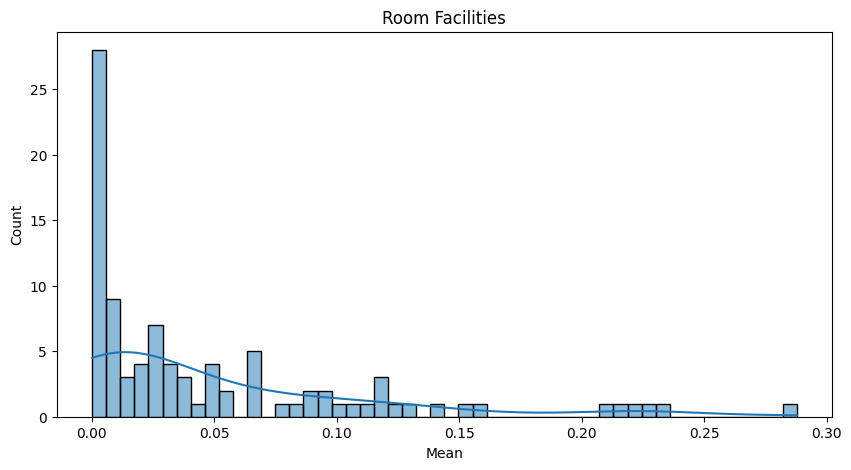

In [43]:
getHist(dfMeanRooom, 'Room')

#### Point of Interest Features

In [44]:
dfMeanPoint.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean,19.0,0.195143,0.242842,0.000203,0.004254,0.026534,0.337553,0.690298


In [45]:
dfMeanPoint, dfPoint = featureSelection(dfPoint)
dfMeanPoint


Null value : False
Final Number of Features: 19
Number of Facilities Removed: 0
Q1: 0.0042535953007899535
Q3: 0.33755316994125983
IQR: 0.3332995746404699


,Facilities,Mean
0,Point_SHOPPING_AREA,0.645534
1,Point_OFFICIAL_BUILDING,0.295929
2,Point_RESTAURANT,0.690298
3,Point_ATTRACTION,0.579907
4,Point_BEACH,0.326717
5,Point_MONUMENT,0.362771
6,Point_TERMINAL,0.348390
7,Point_PARK,0.324286
8,Point_HOSPITAL,0.019242
9,Point_MUSEUM,0.021876


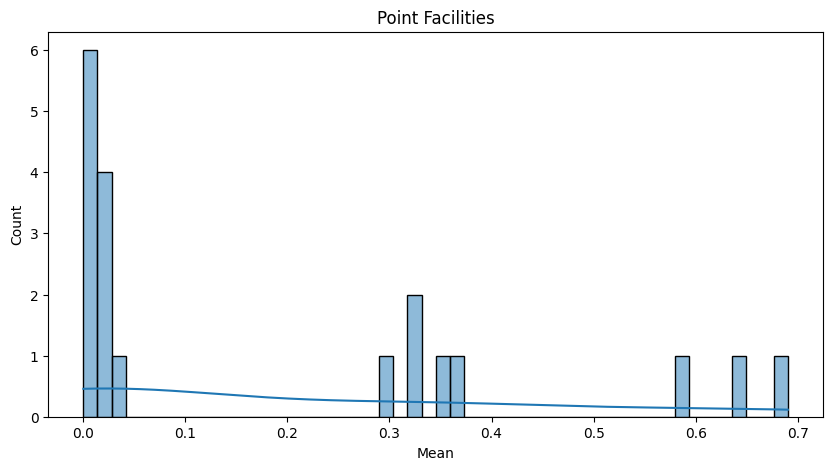

In [46]:
getHist(dfMeanPoint, 'Point')

In [47]:
hotelFacilities = dfHotel.drop(dfHotel.columns[0], axis=1)
roomFacilities = dfRoom.drop(dfRoom.columns[0], axis=1)
nearestPointOfInterests = dfPoint.drop(dfPoint.columns[0], axis=1)

hotelFacilities = hotelFacilities.columns
roomFacilities = roomFacilities.columns
nearestPointOfInterests = nearestPointOfInterests.columns

In [48]:
# export hotelFacilities, roomFacilities, nearestPointOfInterests list to another notebook
with open('../Notebook/Variable/hotelFacilities.pkl', 'wb') as f:
    pickle.dump(hotelFacilities, f)
with open('../Notebook/Variable/roomFacilities.pkl', 'wb') as f:
    pickle.dump(roomFacilities, f)
with open('../Notebook/Variable/nearestPointOfInterests.pkl', 'wb') as f:
    pickle.dump(nearestPointOfInterests, f)

## Combine Dataframe

In [49]:
dfRoom.drop('Room_originalRate', axis=1, inplace=True)
dfHotel.drop('Hotel_originalRate', axis=1, inplace=True)
dfPoint.drop('Point_originalRate', axis=1, inplace=True)
dfHotelEx.drop('originalRate', axis=1, inplace=True)
dfRoomEx.drop('originalRate', axis=1, inplace=True)
df = df[['originalRate']]


C:\Users\goobe\AppData\Local\Temp\ipykernel_7312\287735084.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfRoomEx.drop('originalRate', axis=1, inplace=True)


In [50]:
# sort the columns
# dfRoom = dfRoom.reindex(sorted(dfRoom.columns), axis=1)
# dfHotel = dfHotel.reindex(sorted(dfHotel.columns), axis=1)
# dfPoint = dfPoint.reindex(sorted(dfPoint.columns), axis=1)

In [51]:
combine = [df,  dfRoomEx, dfHotelEx, dfRoom, dfHotel, dfPoint]
df = pd.concat(combine, axis=1)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [52]:
# Check if there is any duplicate column
for i in range(0, len(df.columns)):
    for j in range(i+1, len(df.columns)):
        if df.columns[i] == df.columns[j]:
            print(df.columns[i])


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4678 entries, 0 to 4677
Columns: 359 entries, originalRate to Point_SCHOOL
dtypes: float64(329), int64(9), uint8(21)
memory usage: 12.2 MB


## Export Data

In [54]:
df.to_csv('../Dataset/encoded_data.csv', index=False)

In [55]:
col = df.columns
# export col to another notebook
with open('../Notebook/Variable/col.pkl', 'wb') as f:
    pickle.dump(col, f)

# Data Analysis

In [56]:
# create visualization into 1 chart
def createVisualization(df, colName, color):
    # create new dataframe with input prefix column name
    dfNew = pd.DataFrame()
    for i in range(1, len(df.columns)):
        if df.columns[i].startswith(f'{colName}'):
            dfNew[df.columns[i]] = df[df.columns[i]]
    # make table with only the column name and sum of value
    dfNew = dfNew.sum().to_frame()
    dfNew.reset_index(inplace=True)
    dfNew.columns = ['column', 'value']
    # change value data type to int
    dfNew['value'] = dfNew['value'].astype(int)
    # sort value
    dfNew = dfNew.sort_values(by='value', ascending=False)
    print(dfNew.head(10))
    # create barchart to visualize the data with sorted value and horizontal with tight gap and annotate the value on top of each bar
    plt.figure(figsize=(8.5, 5))
    sns.barplot(x='value', y='column', data=dfNew.head(
        10), orient='h', color=color, errorbar=None, )
    # plt.tight_layout()
    # annotate the value on top of each bar using seaborn annotation
    for i, v in enumerate(dfNew['value'].head(10)):
        plt.text(v+10, i, str(v), color='black', fontweight=300, fontsize=8)
    plt.show()


            column  value
0      City_Badung   2000
4     City_Gianyar    924
7   City_Klungkung    469
2    City_Buleleng    332
6  City_Karangasem    260
8       City_Sanur    237
3    City_Denpasar    224
9     City_Tabanan    122
5    City_Jembrana     58
1      City_Bangli     52


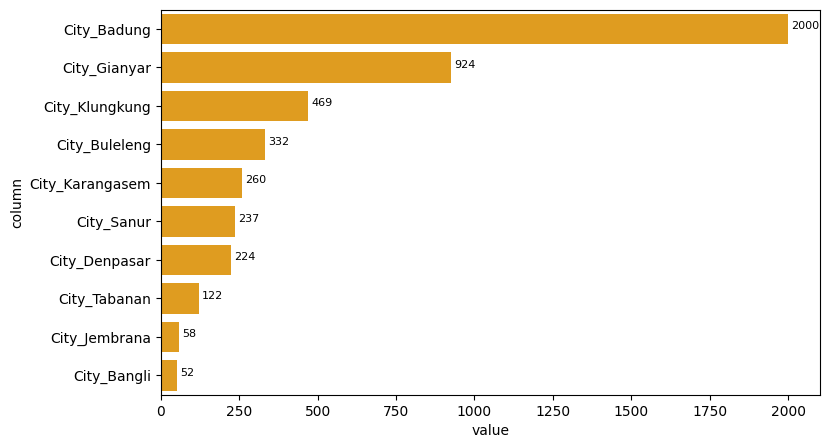

In [57]:
createVisualization(df, 'City', 'orange')

               column  value
6          Type_Hotel   2251
9          Type_Resor    639
10          Type_Vila    628
3    Type_Guest House    617
4       Type_Homestay    248
1            Type_B&B    103
5         Type_Hostel    102
0      Type_Apartemen     74
2        Type_Camping     11
7   Type_Hotel Kapsul      4


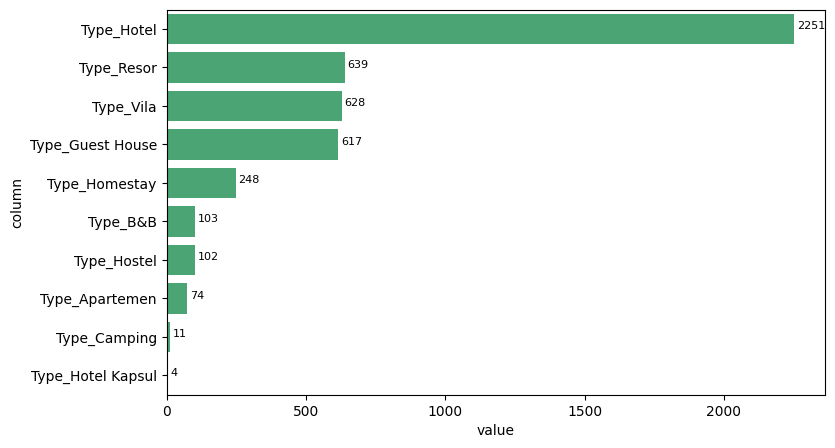

In [58]:
createVisualization(df, 'Type', 'mediumseagreen')

                     column  value
2          Point_RESTAURANT   3244
0       Point_SHOPPING_AREA   3003
3          Point_ATTRACTION   2709
5            Point_MONUMENT   1706
6            Point_TERMINAL   1641
7                Point_PARK   1534
4               Point_BEACH   1525
1   Point_OFFICIAL_BUILDING   1376
10            Point_GALLERY    151
12      Point_TRAIN_STATION    122


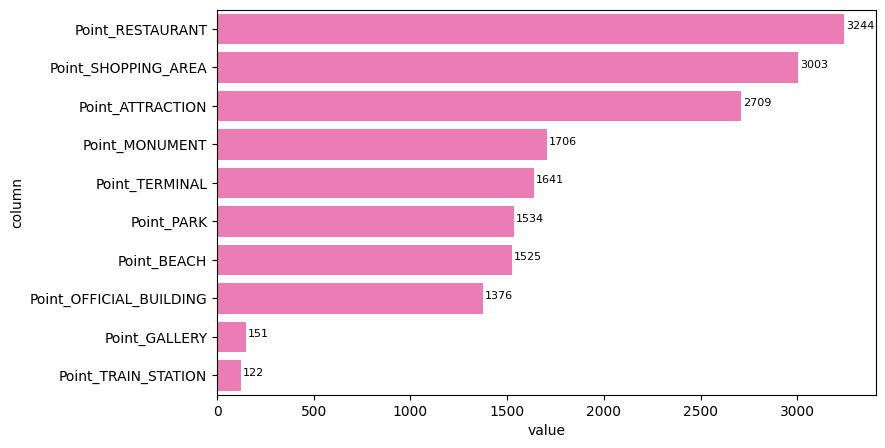

In [59]:
createVisualization(df, 'Point', 'hotpink')